# Programación declarativa @ GIA - URJC
## Curso 23-24
## Convocatoria ordinaria, 21-05-2024
## Prueba 2

La duración de la prueba es de 1 hora y 30 minutos.


# Definiciones auxiliares

In [ ]:
import $ivy.`org.scalatest::scalatest:3.2.16`
import org.scalatest.{Filter => _, _}, flatspec._, matchers._

In [ ]:
object Signatures:
    abstract class List[A]:
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def reduce(f: (A, A) => A): A
 
        // Common functions
        def length: Int
        def drop(i: Int): List[A]
        def reverse: List[A]
        def flatten[B](/* A debe poder convertirse al tipo List[B] */): List[B]

# Ejercicio 1
__(5 puntos)__

Se desea implementar una función `pair` que empareja un elemento dado con todos los elementos de una lista. El siguiente test ilustra el comportamiento de la función para elementos de tipo `Int`:

In [ ]:
class TestPair(pair: (Int, List[Int]) => List[(Int, Int)])  extends AnyFlatSpec with should.Matchers:
    
    "pair" should "work" in:
        pair(1, List()) shouldBe List()
        pair(1, List(2)) shouldBe List((1,2))
        pair(1, List(2,3,4)) shouldBe List((1,2),(1,3),(1,4))
        pair(3, List(2,7,1,9)) shouldBe List((3,2),(3,7),(3,1),(3,9))

__a) (1 punto)__ Implementa la función `pair` mediante recursividad (no final). 

In [ ]:
// Implementa tu solución en esta celda



In [ ]:
run(TestPair(pair))

__b) (1 punto)__ Implementa la función `pair` mediante recursividad final. 

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestPair(pair))

__c) (1 punto)__ Implementa la función `pair` mediante la función de orden superior `foldRight`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestPair(pair))

__d) (1 punto)__ Implementa la función `pair` mediante la función de orden superior `foldLeft`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestPair(pair))

__e) (0.5 puntos)__ Implementa la función `pair` mediante la función de orden superior `map`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestPair(pair))

__f) (0.5 puntos)__ Implementa la función `pair` mediante la función de orden superior `flatMap`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestPair(pair))

# Ejercicio 2
__(2,5 puntos)__

Una lista no vacía se puede descomponer en cabeza y resto; si el resto es no vacío, se puede extraer el resto del resto; y así sucesivamente hasta llegar al resto vacío. Se desea implementar una función `tails` que devuelve todos los restos que se pueden extraer de una lista dada. La función se ilustra a continuación con los siguientes tests: 

In [ ]:
class TestTails(tails: List[Int] => List[List[Int]])  extends AnyFlatSpec with should.Matchers:
    
    "tails" should "work" in:
        tails(1 :: (2 :: (3 :: (4 :: Nil)))) shouldBe List(List(2,3,4), List(3,4), List(4), Nil)
        tails(1 :: Nil) shouldBe List(Nil)
        tails(Nil) shouldBe List()

__a) (1 punto)__ Implementa la función `tails` mediante una función recursiva.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestTails(tails))

__b) (1,5 puntos)__ Considera la siguiente función `til`, que permite generar una lista de números naturales consecutivos de un tamaño dado, empezando desde el 0.

In [ ]:
def til(i: Int): List[Int] = 
    (0 to i-1).toList

Por ejemplo: 

In [ ]:
til(0) == List()
til(1) == List(0)
til(4) == List(0,1,2,3)

Asimismo, considera la función `drop` de la librería estándar de Scala, que permite eliminar los primeros elementos de una lista. Por ejemplo: 

In [ ]:
List(1,2,3).drop(0) == List(1,2,3)
List(1,2,3).drop(1) == List(2,3)
List(1,2,3).drop(2) == List(3)
List(1,2,3).drop(3) == List()

Por último, considera también la función `length`, que permite determinar el número de elementos de una lista: 

In [ ]:
List().length == 0
List(1,2,3).length == 3

Se pide implementar la función `tails` mediante las funciones `drop`, `til`, `length` y la función de orden superior `map`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestTails(tails))

# Ejercicio 3
__(2,5 puntos)__

Se desea implementar una función que calcula las combinaciones sin repetición de los elementos de una lista, tomados de dos en dos. Si la lista tiene menos de dos elementos, se devolverá la lista vacía. El comportamiento de la función está ilustrado por los siguiente tests: 

In [ ]:
class TestCombinaciones2(combinaciones2: List[Int] => List[(Int, Int)])  
extends AnyFlatSpec with should.Matchers:
    
    "combinaciones" should "work" in:
        combinaciones2(List()) shouldBe List()
        combinaciones2(List(1)) shouldBe List()
        combinaciones2(List(1,2,3,4,5)) shouldBe 
            List((1,2),(1,3),(1,4),(1,5),
                       (2,3),(2,4),(2,5),
                             (3,4),(3,5),
                                   (4,5))

__a) (1 punto)__ Implementa la función `combinaciones2` mediante una función recursiva. Para ello se deberá utilizar la función `pair` descrita en el ejercicio 1.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestCombinaciones2(combinaciones2))

__b) (1,5 puntos)__ Se desea implementar la función `combinaciones2` de una forma más declarativa con la ayuda de la función `map2`. Esta función de orden superior recibe dos listas y aplica una función binaria a cada uno de los pares de elementos que se encuentran en la misma posición de ambas listas. Su implementación es la siguiente:

In [ ]:
def map2[A, B, C](as: List[A], bs: List[B])(f: (A, B) => C): List[C] = (as, bs) match
    case (a :: as, b :: bs) => f(a, b) :: map2(as, bs)(f)
    case _ => Nil

Por ejemplo, la función `map2` permite sumar dos listas de enteros de la siguiente forma: 

In [ ]:
map2(List(1,2,3), List(1,2,3))(_+_)

Para implementar la función `combinaciones2` mediante la función `map2` se deberá seguir el algoritmo ilustrado en el siguiente gráfico: 

<div>
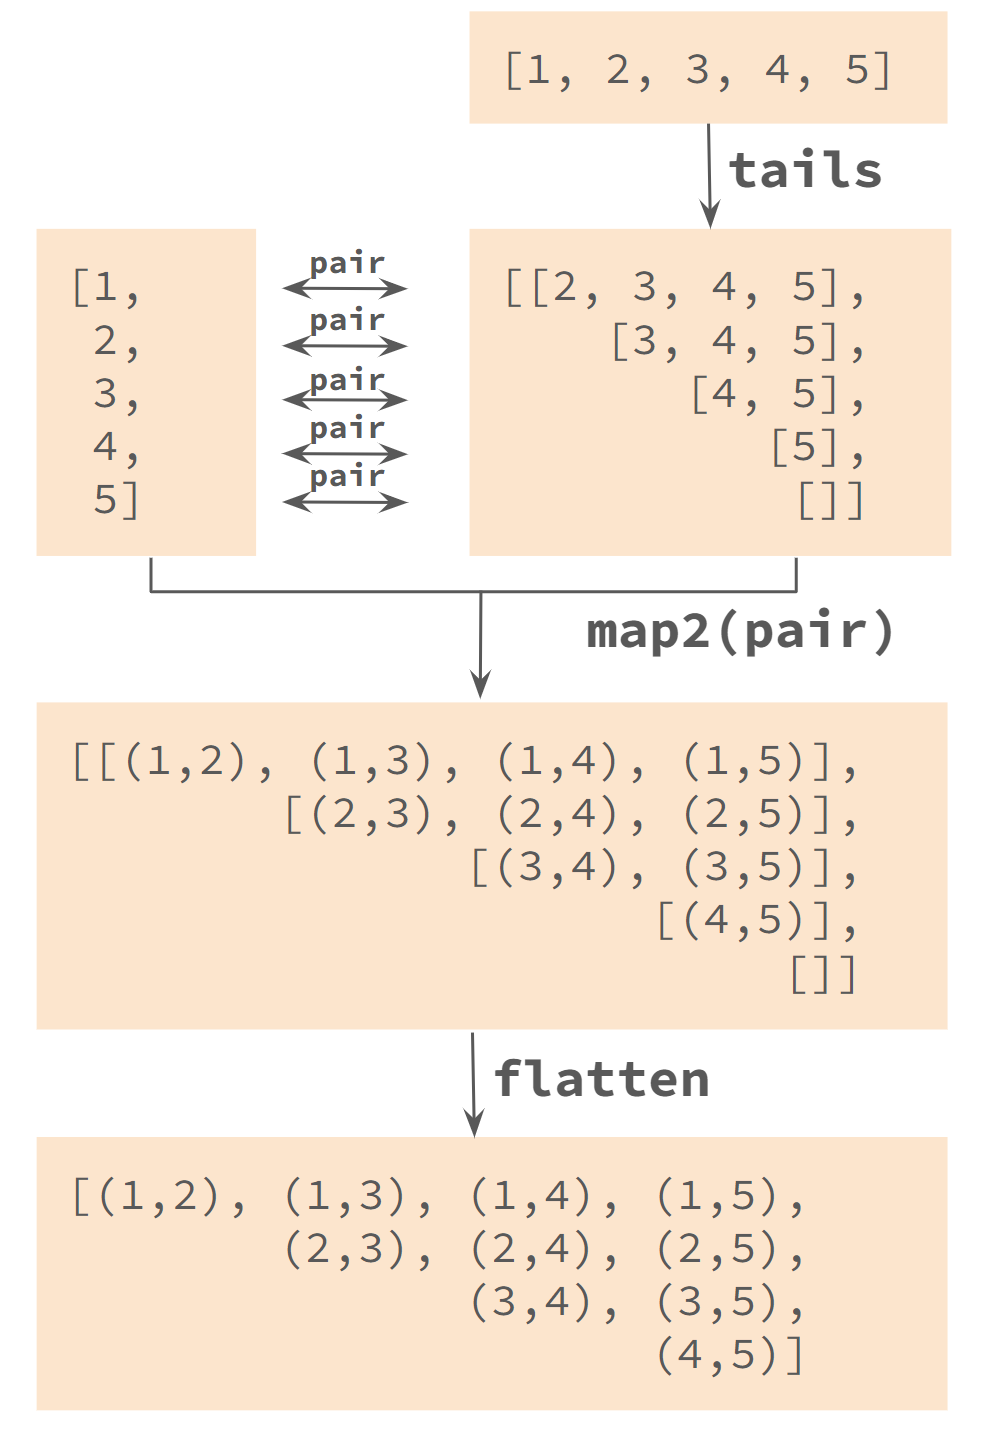
</div>


De acuerdo con este algoritmo, en primer lugar se obtienen los restos de la lista de entrada mediante la función `tails` (explicada en el ejercicio 2); a continuación se aplica la función `pair` (explicada en el ejercicio 1) a cada elemento con su resto correspondiente mediante la función `map2`; por último, se concatenan las listas de pares resultantes con la función `flatten`.

Se pide implementar la función `combinaciones2` haciendo uso de las funciones `map2`, `pair`, `tails` y `flatten`. Se recuerda que la función `flatten` permite concatenar todas las listas de una lista de listas. Por ejemplo: `List(List(1,2), List(3), List()).flatten == List(1,2,3)`.

In [ ]:
// Implementa tu solución en esta celda


In [ ]:
run(TestCombinaciones2(combinaciones2))